conda install -c conda-forge opencv

In [11]:
conda install -c conda-forge tensorflow

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.shape

(42000, 785)

In [13]:
x = train.to_numpy()[0:,1:].reshape(len(train),28,28,1) 
y = train.label.to_numpy()

In [11]:
test.shape

(28000, 784)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

In [18]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))


In [21]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3463 - accuracy: 0.9001
Epoch 2/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1395 - accuracy: 0.9581
Epoch 3/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0923 - accuracy: 0.9711
Epoch 4/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0669 - accuracy: 0.9788
Epoch 5/5
263/263 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9681


[0.10254273563623428, 0.9680952429771423]

In [23]:
model.save("digits.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: digits.model\assets


In [24]:
loss, accuracy= model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

263/263 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9681
0.9680952429771423
0.10254273563623428


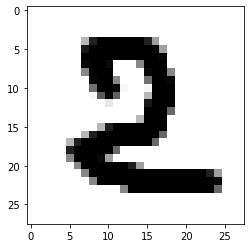

the result is probably: 2


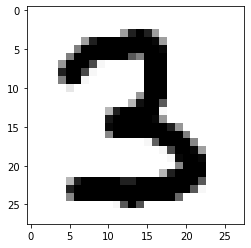

the result is probably: 3


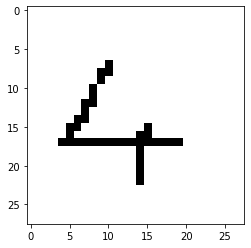

the result is probably: 4


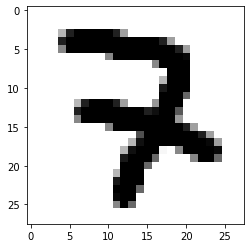

the result is probably: 3


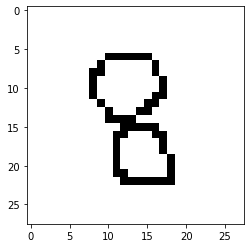

the result is probably: 8


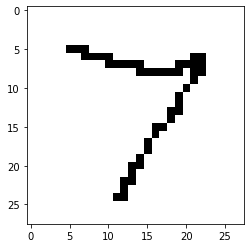

the result is probably: 7


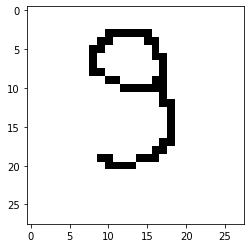

the result is probably: 3


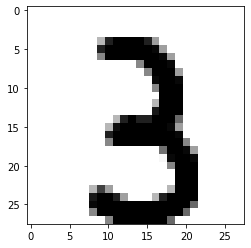

the result is probably: 3


In [32]:
for i in range (1,9):
    img=cv.imread(f'{i}.png')[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
    print("the result is probably:",np.argmax(prediction))